In [1]:
!pip install statsmodel
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.0
    Uninstalling ml_dtypes-0.5.0:
      Successfully uninstalled ml_dtypes-0.5.0


In [2]:
import pyodbc
import pandas as pd
import numpy as np
import jinja2
import matplotlib.pyplot as plt
import joblib

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2025-01-30 17:16:11.003129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-30 17:16:11.902450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-30 17:16:12.161070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 17:16:14.139745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-30 17:16:18.539697: W tensorflow/comp

In [3]:
server = 'techentdec.database.windows.net'  
database = 'QAECECRM_dec'                   
username = 'dbadmin'                
password = 'DashTech1234'         
connection_string = f"""
Driver={{ODBC Driver 17 for SQL Server}};
Server={server};
Database={database};
Uid={username};
Pwd={password};
Encrypt=yes;
TrustServerCertificate=no;
Connection Timeout=30;
"""

try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print(f"Connection failed: {e}")
    exit()

sql_query = """
SELECT L.*,B.*, BA.*
FROM Lead AS L
JOIN BlueCard AS B ON L.LeadId = B.LeadId
JOIN BlueCardArtist AS BA ON B.BlueCardId = BA.BlueCardId  
"""

df = pd.read_sql(sql_query, connection)
print(df) 

/tmp/ipykernel_3063/2240645407.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


        LeadId    AgentId  RecommendedAgentId FirstName  LastName  \
0            6      417.0                 NaN   Presley   Bennett   
1            6      417.0                 NaN   Presley   Bennett   
2            6      417.0                 NaN   Presley   Bennett   
3            6      417.0                 NaN   Presley   Bennett   
4            6      417.0                 NaN   Presley   Bennett   
...        ...        ...                 ...       ...       ...   
158262   45663  1000418.0                 NaN   Allison  Shilling   
158263   45663  1000418.0                 NaN   Allison  Shilling   
158264   45663  1000418.0                 NaN   Allison  Shilling   
158265   45663  1000418.0                 NaN   Allison  Shilling   
158266   45663  1000418.0                 NaN   Allison  Shilling   

                      EmailAddress     PhoneNumber  CanText  \
0            psbennett92@gmail.com    662-902-6385     True   
1            psbennett92@gmail.com    662-902

In [4]:
df.columns

Index(['LeadId', 'AgentId', 'RecommendedAgentId', 'FirstName', 'LastName',
       'EmailAddress', 'PhoneNumber', 'CanText', 'EventDate', 'EventVenueName',
       'EventCity', 'EventStateId', 'EventTypeId', 'LeadSourceId', 'ArtistId',
       'ArtistName', 'Participant1Name', 'Participant2Name',
       'Participant1TypeId', 'Participant2TypeId', 'EventNotes',
       'ReferralSource', 'ReferralArtistName', 'ReferralAgentName',
       'ReferralEventDate', 'ReferralPresenterName', 'ReferralVenueName',
       'ReferralContact', 'ReferralNotes', 'SubmissionDate', 'IsClosed',
       'ClosedDate', 'WebData', 'CreatedDate', 'CreatedById', 'UpdatedDate',
       'UpdatedById', 'ArchiveDate', 'LineOfBusinessId', 'BlueCardId',
       'AgentId', 'PresenterId', 'AccountName', 'OrganizationName',
       'EventTypeId', 'LeadId', 'VenueId', 'VenueName',
       'VenuePhysicalAddress1', 'VenuePhysicalAddress2', 'VenuePhysicalCity',
       'VenuePhysicalStateId', 'VenuePhysicalZip', 'VenuePhysicalCountryId'

In [5]:
#df = df.drop(['VenuePhysicalStateId', 'VenuePhysicalZip', 'VenuePhysicalCountryId', 'VenueSettingId', 'LeadId', 'AgentId', 'RecommendedAgentId','Participant1TypeId', 'Participant2TypeId', 'LineOfBusinessId', 'BlueCardId', 'PresenterId', 'CreatedById', 'UpdatedById', 'CloneBlueCardId', 'BlueCardArtistId', 'ClosedDate', 'CreatedDate', 'UpdatedDate', 'ArchiveDate', 'Notes', 'ClosedReasonId', 'IsClosed', 'EventTypeId', 'ArtistId', 'FirstName', 'LastName', 'EmailAddress', 'ArtistName', 'Participant1Name', 'Participant2Name', 'EventNotes', 'ReferralSource', 'ReferralArtistName', 'ReferralAgentName', 'ReferralPresenterName', 'ReferralVenueName', 'PhoneNumber', 'ReferralEventDate', 'ReferralContact', 'ReferralNotes', 'WebData', 'AccountName', 'OrganizationName', 'VenueName', 'VenuePhysicalAddress1', 'VenuePhysicalAddress2', 'VenuePhysicalCity'], axis=1)

In [6]:
df.head()

,LeadId,AgentId,RecommendedAgentId,FirstName,LastName,EmailAddress,PhoneNumber,CanText,EventDate,EventVenueName,...,BlueCardId,ArtistId,Gross,Net,Notes,IsDeleted,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,6,417.0,NaN,Presley,Bennett,psbennett92@gmail.com,662-902-6385,True,2019-03-16 00:00:00,Sea Island,...,800394,13683,15000.0,NaN,,False,2018-06-04 13:34:34.207,417,2018-06-04 13:37:40.743,417.0
1,6,417.0,NaN,Presley,Bennett,psbennett92@gmail.com,662-902-6385,True,2019-03-16 00:00:00,Sea Island,...,800394,13910,36500.0,NaN,,False,2018-06-04 13:38:35.527,417,2018-06-04 15:51:01.637,417.0
2,6,417.0,NaN,Presley,Bennett,psbennett92@gmail.com,662-902-6385,True,2019-03-16 00:00:00,Sea Island,...,800394,30359,11500.0,NaN,,False,2018-06-04 13:38:35.527,417,2018-06-04 13:39:55.683,417.0
3,6,417.0,NaN,Presley,Bennett,psbennett92@gmail.com,662-902-6385,True,2019-03-16 00:00:00,Sea Island,...,800394,32109,10250.0,NaN,,False,2018-06-04 13:38:35.527,417,2018-06-04 13:39:55.713,417.0
4,6,417.0,NaN,Presley,Bennett,psbennett92@gmail.com,662-902-6385,True,2019-03-16 00:00:00,Sea Island,...,800394,16629,24500.0,NaN,,False,2018-06-04 13:38:35.540,417,2018-06-04 15:51:01.667,417.0


In [7]:
df.dtypes.value_counts()

object            36
float64           19
int64             13
datetime64[ns]     9
bool               5
Name: count, dtype: int64

In [8]:
#Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

In [9]:
df.dtypes.value_counts()

object            34
float64           16
int64              7
bool               4
datetime64[ns]     4
Name: count, dtype: int64

In [10]:
#Boolean columns
label_encoder = LabelEncoder()
df['CanText'] = label_encoder.fit_transform(df['CanText'])
df['IsSettingCovered'] = label_encoder.fit_transform(df['IsSettingCovered'])
df['IsPublicEvent'] = label_encoder.fit_transform(df['IsPublicEvent'])
df['IsInProgress'] = label_encoder.fit_transform(df['IsInProgress'])
df['IsDeleted'] = label_encoder.fit_transform(df['IsDeleted'])
df['IsClosed'] = label_encoder.fit_transform(df['IsClosed'])

In [11]:
df.dtypes.value_counts()

object            32
float64           16
int64             13
datetime64[ns]     4
Name: count, dtype: int64

In [12]:
# Select object type columns
object_columns = df.select_dtypes(include='object')

print(object_columns.columns)

Index(['FirstName', 'LastName', 'EmailAddress', 'PhoneNumber', 'EventDate',
       'EventVenueName', 'EventCity', 'ArtistName', 'Participant1Name',
       'Participant2Name', 'EventNotes', 'ReferralSource',
       'ReferralArtistName', 'ReferralAgentName', 'ReferralEventDate',
       'ReferralPresenterName', 'ReferralVenueName', 'ReferralContact',
       'ReferralNotes', 'WebData', 'ArchiveDate', 'AccountName',
       'OrganizationName', 'VenueName', 'VenuePhysicalAddress1',
       'VenuePhysicalAddress2', 'VenuePhysicalCity', 'VenuePhysicalZip',
       'EventTime', 'EventBudget', 'Notes', 'CloneBlueCardId'],
      dtype='object')


In [13]:
# Select datetime type columns
datetime_columns = df.select_dtypes(include='datetime64[ns]')

print(datetime_columns.columns)

Index(['SubmissionDate', 'ClosedDate', 'CreatedDate', 'UpdatedDate'], dtype='object')


In [14]:
#Since EventDate is the only datetime column needed, dropping the remaining datetime columns
df = df.drop(datetime_columns, axis = 1)

In [15]:
#Removing customer specific and other date columns
df = df.drop(['FirstName', 'LastName', 'EmailAddress', 'PhoneNumber', 'ArchiveDate', 'EventTime'], axis = 1)

In [16]:
df.dtypes

LeadId                      int64
AgentId                   float64
RecommendedAgentId        float64
CanText                     int64
EventDate                  object
EventVenueName             object
EventCity                  object
EventStateId              float64
EventTypeId                 int64
LeadSourceId                int64
ArtistId                  float64
ArtistName                 object
Participant1Name           object
Participant2Name           object
Participant1TypeId        float64
Participant2TypeId        float64
EventNotes                 object
ReferralSource             object
ReferralArtistName         object
ReferralAgentName          object
ReferralEventDate          object
ReferralPresenterName      object
ReferralVenueName          object
ReferralContact            object
ReferralNotes              object
IsClosed                    int64
WebData                    object
CreatedById                 int64
UpdatedById                 int64
LineOfBusiness

In [17]:
for col in df.columns:
    print(df[col].isna().value_counts())

LeadId
False    158267
Name: count, dtype: int64
AgentId
False    158264
True          3
Name: count, dtype: int64
RecommendedAgentId
True     157168
False      1099
Name: count, dtype: int64
CanText
False    158267
Name: count, dtype: int64
EventDate
False    156517
True       1750
Name: count, dtype: int64
EventVenueName
False    158267
Name: count, dtype: int64
EventCity
False    158267
Name: count, dtype: int64
EventStateId
False    122739
True      35528
Name: count, dtype: int64
EventTypeId
False    158267
Name: count, dtype: int64
LeadSourceId
False    158267
Name: count, dtype: int64
ArtistId
True     96118
False    62149
Name: count, dtype: int64
ArtistName
False    158267
Name: count, dtype: int64
Participant1Name
False    158267
Name: count, dtype: int64
Participant2Name
False    158267
Name: count, dtype: int64
Participant1TypeId
False    105949
True      52318
Name: count, dtype: int64
Participant2TypeId
False    104214
True      54053
Name: count, dtype: int64
EventNotes


In [18]:
avg_gross = df['Gross'].sum()/len(df)
print(avg_gross)
df['Gross'].fillna(avg_gross, inplace=True)
df['Gross'].isna().value_counts()

7816.534792470951


Gross
False    158267
Name: count, dtype: int64

In [19]:
df['IsPublicEvent'].fillna(False, inplace=True)
df['IsPublicEvent'].isna().value_counts()

IsPublicEvent
False    158267
Name: count, dtype: int64

In [20]:
avg_venue_capacity = df['VenueCapacity'].sum()/len(df)
print(avg_venue_capacity)
df['VenueCapacity'].fillna(avg_venue_capacity, inplace=True)
df['VenueCapacity'].isna().value_counts()

11.864918144654286


VenueCapacity
False    158267
Name: count, dtype: int64

In [21]:
df['IsSettingCovered'].fillna(False, inplace=True)
df['IsSettingCovered'].isna().value_counts()

IsSettingCovered
False    158267
Name: count, dtype: int64

In [22]:
df.columns

Index(['LeadId', 'AgentId', 'RecommendedAgentId', 'CanText', 'EventDate',
       'EventVenueName', 'EventCity', 'EventStateId', 'EventTypeId',
       'LeadSourceId', 'ArtistId', 'ArtistName', 'Participant1Name',
       'Participant2Name', 'Participant1TypeId', 'Participant2TypeId',
       'EventNotes', 'ReferralSource', 'ReferralArtistName',
       'ReferralAgentName', 'ReferralEventDate', 'ReferralPresenterName',
       'ReferralVenueName', 'ReferralContact', 'ReferralNotes', 'IsClosed',
       'WebData', 'CreatedById', 'UpdatedById', 'LineOfBusinessId',
       'BlueCardId', 'PresenterId', 'AccountName', 'OrganizationName',
       'VenueId', 'VenueName', 'VenuePhysicalAddress1',
       'VenuePhysicalAddress2', 'VenuePhysicalCity', 'VenuePhysicalStateId',
       'VenuePhysicalZip', 'VenuePhysicalCountryId', 'VenueSettingId',
       'VenueCapacity', 'IsSettingCovered', 'IsPublicEvent', 'EventBudget',
       'Notes', 'IsInProgress', 'ClosedReasonId', 'CloneBlueCardId',
       'BlueCardAr

In [23]:
df.dtypes

LeadId                      int64
AgentId                   float64
RecommendedAgentId        float64
CanText                     int64
EventDate                  object
EventVenueName             object
EventCity                  object
EventStateId              float64
EventTypeId                 int64
LeadSourceId                int64
ArtistId                  float64
ArtistName                 object
Participant1Name           object
Participant2Name           object
Participant1TypeId        float64
Participant2TypeId        float64
EventNotes                 object
ReferralSource             object
ReferralArtistName         object
ReferralAgentName          object
ReferralEventDate          object
ReferralPresenterName      object
ReferralVenueName          object
ReferralContact            object
ReferralNotes              object
IsClosed                    int64
WebData                    object
CreatedById                 int64
UpdatedById                 int64
LineOfBusiness

In [24]:
df['EventBudget'].value_counts()

EventBudget
            138128
5000          2177
10000         1120
4000           895
6000           869
             ...  
1,000.00         1
flexible         1
25-30K           1
$6000            1
15,000           1
Name: count, Length: 572, dtype: int64

In [25]:
df['Net'].value_counts()

Net
2000.0     104
4000.0      93
1000.0      93
5000.0      82
1500.0      81
          ... 
4598.0       1
1550.0       1
18750.0      1
825.0        1
730.0        1
Name: count, Length: 282, dtype: int64

In [26]:
df = df[df['EventBudget']!= 'flexible']
df['EventBudget'] = df['EventBudget'].fillna('').astype(str)
pattern = r'[-?$]'
df = df[~df['EventBudget'].str.contains(pattern, regex=True)].reset_index(drop=True)
# Apply the function to filter rows with valid budgets
df['EventBudget'] = df['EventBudget'].str.extract(r'(\d+(?:\.\d+)?(?:k)?)')  # Extract numeric and 'k'
df['EventBudget'] = df['EventBudget'].str.replace('k', '000', regex=False).astype(float, errors='ignore')

In [27]:
df['EventBudget'].value_counts()

EventBudget
5000.0     2573
10000.0    1531
4000.0     1044
6000.0     1012
3000.0      850
           ... 
1700.0        2
800.0         2
0.0           1
1100.0        1
9250.0        1
Name: count, Length: 68, dtype: int64

In [28]:
df['VenueCapacity'].value_counts()

VenueCapacity
11.864918      145619
300.000000       1256
250.000000       1051
400.000000        548
200.000000        362
                ...  
929.000000          1
3500.000000         1
474.000000          1
540.000000          1
88.000000           1
Name: count, Length: 72, dtype: int64

In [29]:
numeric_columns = ['EventBudget', 'Gross', 'Net', 'VenueCapacity']
for col in df.columns:
    if col not in numeric_columns:
        df[col] = label_encoder.fit_transform(df[col])

In [30]:
df.dtypes

LeadId                      int64
AgentId                     int64
RecommendedAgentId          int64
CanText                     int64
EventDate                   int64
EventVenueName              int64
EventCity                   int64
EventStateId                int64
EventTypeId                 int64
LeadSourceId                int64
ArtistId                    int64
ArtistName                  int64
Participant1Name            int64
Participant2Name            int64
Participant1TypeId          int64
Participant2TypeId          int64
EventNotes                  int64
ReferralSource              int64
ReferralArtistName          int64
ReferralAgentName           int64
ReferralEventDate           int64
ReferralPresenterName       int64
ReferralVenueName           int64
ReferralContact             int64
ReferralNotes               int64
IsClosed                    int64
WebData                     int64
CreatedById                 int64
UpdatedById                 int64
LineOfBusiness

In [31]:
print(df.isnull().sum())

LeadId                         0
AgentId                        0
RecommendedAgentId             0
CanText                        0
EventDate                      0
EventVenueName                 0
EventCity                      0
EventStateId                   0
EventTypeId                    0
LeadSourceId                   0
ArtistId                       0
ArtistName                     0
Participant1Name               0
Participant2Name               0
Participant1TypeId             0
Participant2TypeId             0
EventNotes                     0
ReferralSource                 0
ReferralArtistName             0
ReferralAgentName              0
ReferralEventDate              0
ReferralPresenterName          0
ReferralVenueName              0
ReferralContact                0
ReferralNotes                  0
IsClosed                       0
WebData                        0
CreatedById                    0
UpdatedById                    0
LineOfBusinessId               0
BlueCardId

In [32]:
avg_budget = df['EventBudget'].sum()/len(df)
print(avg_budget)
df['EventBudget'].fillna(avg_budget, inplace=True)
df['EventBudget'].isna().value_counts()

478.36499811019235


EventBudget
False    150809
Name: count, dtype: int64

In [33]:
avg_net = df['Net'].sum()/len(df)
print(avg_net)
df['Net'].fillna(avg_net, inplace=True)
df['Net'].isna().value_counts()

61.88668448169539


Net
False    150809
Name: count, dtype: int64

In [34]:
print(df.isnull().sum())

LeadId                    0
AgentId                   0
RecommendedAgentId        0
CanText                   0
EventDate                 0
EventVenueName            0
EventCity                 0
EventStateId              0
EventTypeId               0
LeadSourceId              0
ArtistId                  0
ArtistName                0
Participant1Name          0
Participant2Name          0
Participant1TypeId        0
Participant2TypeId        0
EventNotes                0
ReferralSource            0
ReferralArtistName        0
ReferralAgentName         0
ReferralEventDate         0
ReferralPresenterName     0
ReferralVenueName         0
ReferralContact           0
ReferralNotes             0
IsClosed                  0
WebData                   0
CreatedById               0
UpdatedById               0
LineOfBusinessId          0
BlueCardId                0
PresenterId               0
AccountName               0
OrganizationName          0
VenueId                   0
VenueName           

In [35]:
df['EventDate'] = pd.to_datetime(df['EventDate'],errors="coerce")

In [36]:
print(df.isnull().sum())


LeadId                    0
AgentId                   0
RecommendedAgentId        0
CanText                   0
EventDate                 0
EventVenueName            0
EventCity                 0
EventStateId              0
EventTypeId               0
LeadSourceId              0
ArtistId                  0
ArtistName                0
Participant1Name          0
Participant2Name          0
Participant1TypeId        0
Participant2TypeId        0
EventNotes                0
ReferralSource            0
ReferralArtistName        0
ReferralAgentName         0
ReferralEventDate         0
ReferralPresenterName     0
ReferralVenueName         0
ReferralContact           0
ReferralNotes             0
IsClosed                  0
WebData                   0
CreatedById               0
UpdatedById               0
LineOfBusinessId          0
BlueCardId                0
PresenterId               0
AccountName               0
OrganizationName          0
VenueId                   0
VenueName           

In [37]:
# Extract time-related features
df['Year'] = df['EventDate'].dt.year
df['Month'] = df['EventDate'].dt.month
df['Weekday'] = df['EventDate'].dt.weekday
df['Quarter'] = df['EventDate'].dt.quarter

# Add lag features
df['Gross_Lag_1'] = df['Gross'].shift(1)
df['Gross_Lag_2'] = df['Gross'].shift(2)

# Add rolling window features
df['Gross_Rolling_Mean_3'] = df['Gross'].rolling(window=3).mean()
df['Gross_Rolling_Std_3'] = df['Gross'].rolling(window=3).std()

In [38]:
print(df.isnull().sum())


LeadId                  0
AgentId                 0
RecommendedAgentId      0
CanText                 0
EventDate               0
                       ..
Quarter                 0
Gross_Lag_1             1
Gross_Lag_2             2
Gross_Rolling_Mean_3    2
Gross_Rolling_Std_3     2
Length: 63, dtype: int64


In [39]:
df.dropna(axis=0,inplace=True)

In [40]:
# Perform ADF test
result = adfuller(df['Gross'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if (result[1] < 0.05):
    print("Null hypothesis is rejected, The data is stationary")
else:
    print("Null hypothesis cannot be rejected, The data is non-stationary")

ADF Statistic: -388.2629265706641
p-value: 0.0
Null hypothesis is rejected, The data is stationary


In [41]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 25137, Test size: 25134
Train size: 50271, Test size: 25134
Train size: 75405, Test size: 25134
Train size: 100539, Test size: 25134
Train size: 125673, Test size: 25134


In [42]:
df.index

Index([     2,      3,      4,      5,      6,      7,      8,      9,     10,
           11,
       ...
       150799, 150800, 150801, 150802, 150803, 150804, 150805, 150806, 150807,
       150808],
      dtype='int64', length=150807)

In [43]:
# Prepare features and target
X = df.drop(['EventDate', 'Gross'], axis=1)
y = df['Gross']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {mse}')


Random Forest MSE: 489070.09708576027


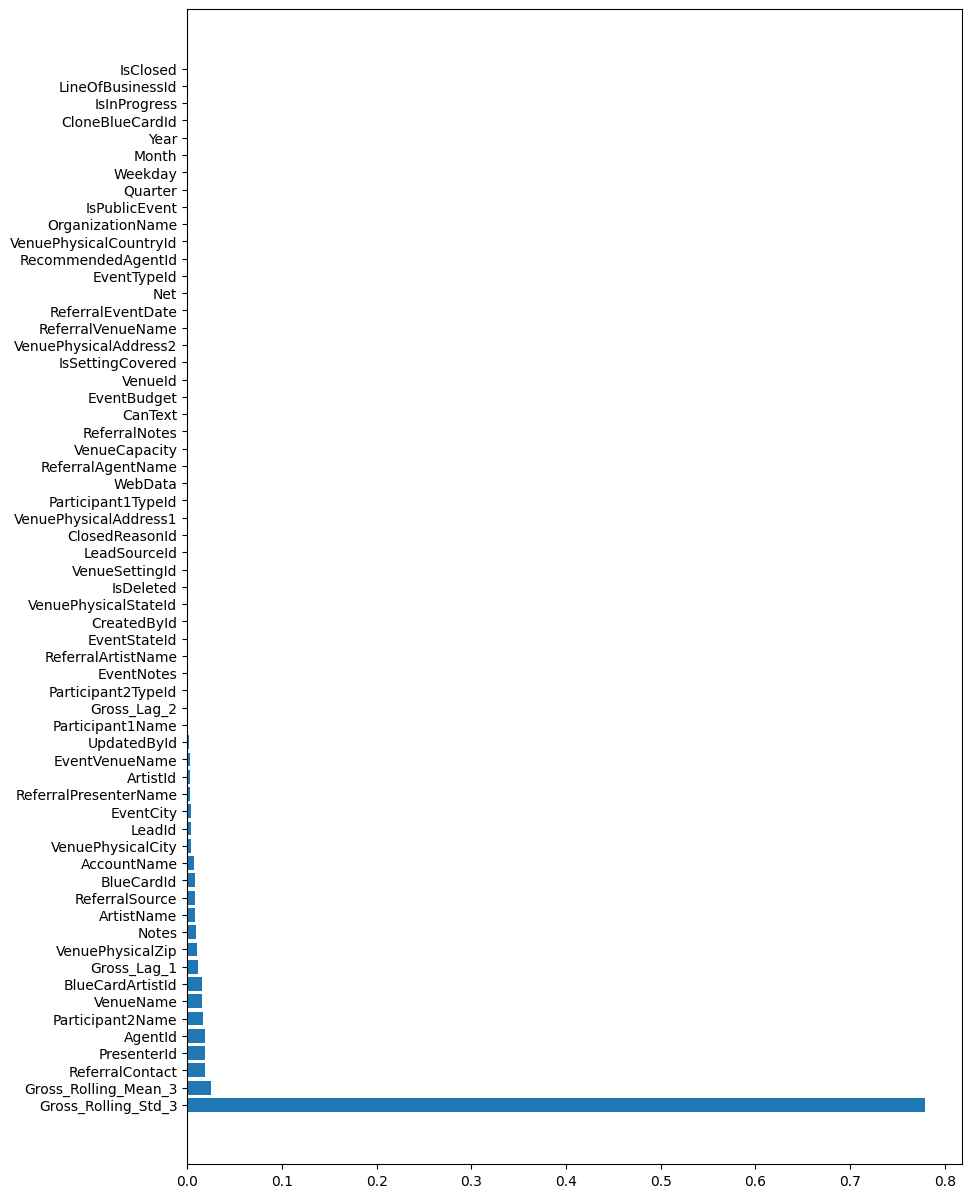

In [45]:
features = list(X_train.columns)
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(10, 15))

plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()


In [46]:
# Prepare features and target
X = df[['Gross_Rolling_Std_3', 'Gross_Rolling_Mean_3', 'ReferralContact', 'PresenterId', 'AgentId', 'Participant2Name', 'VenueName', 'BlueCardArtistId', 'Gross_Lag_1', 'VenuePhysicalZip']]
y = df['Gross']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [47]:
X_train.iloc[:1]

,Gross_Rolling_Std_3,Gross_Rolling_Mean_3,ReferralContact,PresenterId,AgentId,Participant2Name,VenueName,BlueCardArtistId,Gross_Lag_1,VenuePhysicalZip
2,13536.986371,21000.0,14716,6614,38,4414,8609,2,36500.0,0


In [48]:
from sklearn.linear_model import LinearRegression

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')


Linear Regression MSE: 19609126.669592194


In [49]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Decision Tree MSE: {mse}')


Decision Tree MSE: 22327292.147471804


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred = gb.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Gradient Boosting MSE: {mse}')


Gradient Boosting MSE: 11465023.659740595


In [51]:
from sklearn.neural_network import MLPRegressor

# MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'MLP Regressor MSE: {mse}')


MLP Regressor MSE: 12527492.595276466


In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print results
for name, mse in results.items():
    print(f'{name}: MSE = {mse}')


Linear Regression: MSE = 19609126.669592194
Decision Tree: MSE = 22327292.147471804
Random Forest: MSE = 11038817.48574287
Gradient Boosting: MSE = 11465023.659740595
MLP Regressor: MSE = 12527492.595276466


In [ ]:
test_data = pd.DataFrame({
    'Date': df.index[len(X_train):],  
    'Actual Gross': y_test,
    'Predicted Gross': y_pred
})

# Plot actual vs predicted gross
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Actual Gross'], label='Actual Gross', color='blue', marker='o')
plt.plot(test_data.index, test_data['Predicted Gross'], label='Predicted Gross', color='orange', linestyle='--', marker='x')
plt.title('Actual vs Predicted Gross Over Time', fontsize=16)
plt.xlabel('EventDate', fontsize=12)
plt.ylabel('Gross', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(models, 'lr_model_feature_reduction.joblib') 

In [ ]:
test_data.to_csv('test_data.csv')